# Covid Vaccination Data Analysis Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/vaccination-data/vaccination-data(26-08-2021).csv")
df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-08-20,1201286.0,770542.0,3.086,1.979,430744.0,1.107,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,OWID,2021-08-17,1340339.0,764997.0,46.575,26.583,575342.0,19.992,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0
2,Algeria,DZA,AFRO,REPORTING,2021-08-23,4146091.0,3421279.0,9.455,7.802,724812.0,1.653,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",2021-01-30,3.0
3,American Samoa,ASM,WPRO,REPORTING,2021-08-09,52769.0,29210.0,95.601,52.920,24104.0,43.669,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",2020-12-21,3.0
4,Andorra,AND,EURO,OWID,2021-08-15,91660.0,51044.0,118.631,66.064,40616.0,52.567,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Viet Nam,VNM,WPRO,REPORTING,2021-08-13,8061116.0,7241093.0,8.282,7.439,820023.0,0.842,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,5.0
223,Wallis and Futuna,WLF,WPRO,REPORTING,2021-07-22,9276.0,4674.0,82.483,41.561,4602.0,40.921,Moderna - mRNA-1273,2021-03-19,1.0
224,Yemen,YEM,EMRO,REPORTING,2021-07-27,311483.0,298161.0,1.044,1.000,13322.0,0.045,SII - Covishield,2021-04-20,1.0
225,Zambia,ZMB,AFRO,REPORTING,2021-08-23,503707.0,303966.0,2.740,1.653,199741.0,1.086,SII - Covishield,2021-04-14,1.0


**Statistical Data Summary**

In [2]:
df.describe()

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED
count,2.260000e+02,2.180000e+02,226.000000,218.000000,2.160000e+02,216.000000,223.000000
mean,2.044237e+07,8.253955e+06,63.128195,35.854991,4.889511e+06,28.128968,3.219731
std,1.268902e+08,3.473510e+07,51.608722,26.885016,1.641628e+07,25.239769,1.703511
min,7.300000e+01,3.700000e+01,0.078000,0.067000,3.600000e+01,0.007000,1.000000
25%,9.987875e+04,6.933075e+04,13.012250,9.629000,3.332500e+04,3.701500,2.000000
50%,8.988110e+05,5.660505e+05,53.314500,32.594000,3.247290e+05,22.023000,3.000000
75%,6.258963e+06,3.764875e+06,109.896250,61.083750,2.511654e+06,51.619500,4.000000
max,1.776816e+09,4.357201e+08,233.208000,116.933000,1.701386e+08,116.274000,9.000000


In [3]:
df["DATE_UPDATED"]= pd.to_datetime(df["DATE_UPDATED"])
df["FIRST_VACCINE_DATE"]= pd.to_datetime(df["FIRST_VACCINE_DATE"])
df["WHO_REGION"] = df["WHO_REGION"].astype("category")
df["DATA_SOURCE"] = df["DATA_SOURCE"].astype("category")
df["ISO3"] = df["ISO3"].astype("category")
df.dtypes

COUNTRY                                         object
ISO3                                          category
WHO_REGION                                    category
DATA_SOURCE                                   category
DATE_UPDATED                            datetime64[ns]
TOTAL_VACCINATIONS                             float64
PERSONS_VACCINATED_1PLUS_DOSE                  float64
TOTAL_VACCINATIONS_PER100                      float64
PERSONS_VACCINATED_1PLUS_DOSE_PER100           float64
PERSONS_FULLY_VACCINATED                       float64
PERSONS_FULLY_VACCINATED_PER100                float64
VACCINES_USED                                   object
FIRST_VACCINE_DATE                      datetime64[ns]
NUMBER_VACCINES_TYPES_USED                     float64
dtype: object

In [ ]:
from matplotlib import pyplot as plt  
plt.figure(figsize = (10,10))
plt.bar(pp["COUNTRY"],pp["NUMBER_VACCINES_TYPES_USED"],color='c',edgecolor='b') 
plt.title('More Than Six types of vaccine Count')  
plt.xlabel('Country ')  
plt.ylabel('More Than Six types of vaccine') 
plt.xticks(rotation = 90)
plt.show() 

In [47]:
aa = df[["COUNTRY", "VACCINES_USED","NUMBER_VACCINES_TYPES_USED"]]
aa.head()

,COUNTRY,VACCINES_USED,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",4.0
1,Albania,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",4.0
2,Algeria,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",3.0
3,American Samoa,"Janssen - Ad26.COV 2.5,Moderna - mRNA-1273,Pfi...",3.0
4,Andorra,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2.0


In [75]:
pp=aa[aa["NUMBER_VACCINES_TYPES_USED"]>=6.0]
pp

,COUNTRY,VACCINES_USED,NUMBER_VACCINES_TYPES_USED
15,Bahrain,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",7.0
16,Bangladesh,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",8.0
42,China,"Anhui ZL - Recombinant,Beijing CNBG - BBIBP-Co...",6.0
56,Djibouti,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",6.0
60,Egypt,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",6.0
86,Guinea,"Beijing CNBG - BBIBP-CorV,Gamaleya - Sputnik V...",6.0
90,Honduras,"AstraZeneca - Vaxzevria,Gamaleya - Sputnik V,J...",6.0
91,Hungary,"Janssen - Ad26.COV 2.5, Moderna - mRNA-1273, A...",6.0
104,Jordan,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",6.0
111,Lao People's Democratic Republic,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",7.0


In [73]:
b["NUMBER_VACCINES_TYPES_USED"].agg(["max","min"])

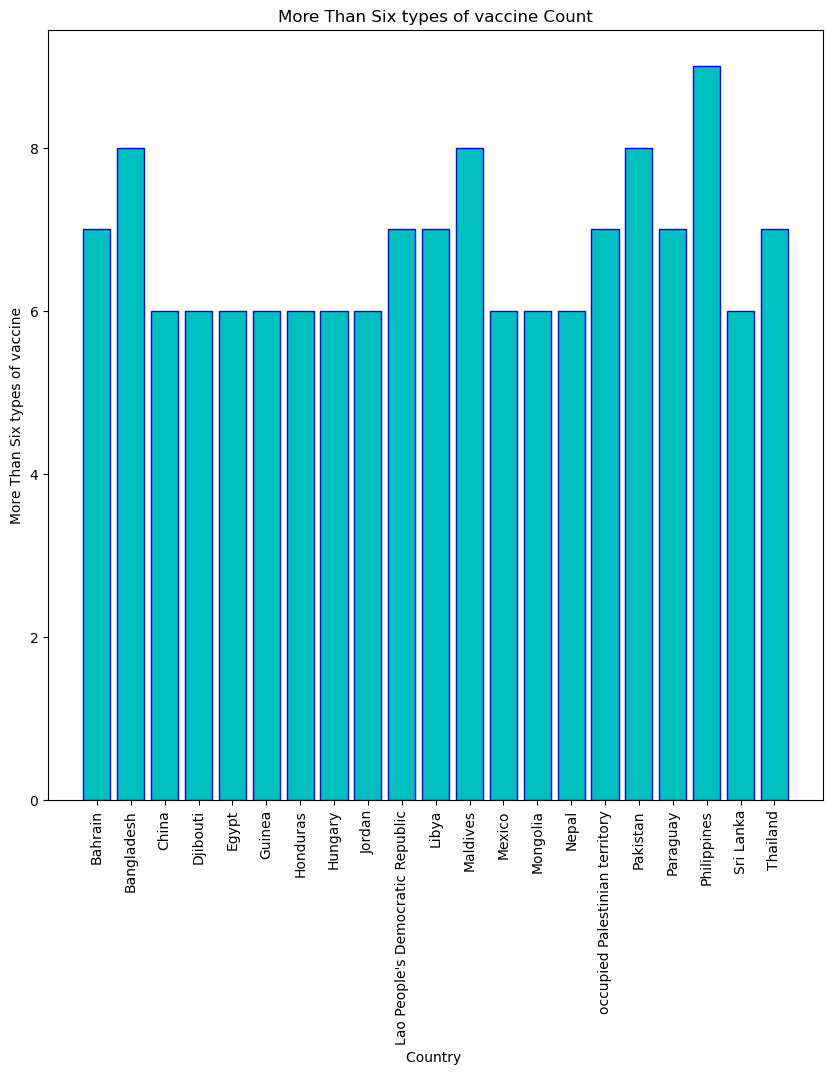

In [80]:
from matplotlib import pyplot as plt  
plt.figure(figsize = (10,10))
plt.bar(pp["COUNTRY"],pp["NUMBER_VACCINES_TYPES_USED"],color='c',edgecolor='b') 
plt.title('More Than Six types of vaccine Count')  
plt.xlabel('Country ')  
plt.ylabel('More Than Six types of vaccine') 
plt.xticks(rotation = 90)
plt.show() 

In [57]:

print(aa[aa["NUMBER_VACCINES_TYPES_USED"]==1.0])

                              COUNTRY                VACCINES_USED  \
5                              Angola             SII - Covishield   
6                            Anguilla      AstraZeneca - Vaxzevria   
33                       Burkina Faso             SII - Covishield   
38                     Cayman Islands  Pfizer BioNTech - Comirnaty   
40                               Chad    Beijing CNBG - BBIBP-CorV   
46                       Cook Islands  Pfizer BioNTech - Comirnaty   
54   Democratic Republic of the Congo             SII - Covishield   
64                           Eswatini             SII - Covishield   
66        Falkland Islands (Malvinas)        AstraZeneca - AZD1222   
73                              Gabon    Beijing CNBG - BBIBP-CorV   
78                          Gibraltar  Pfizer BioNTech - Comirnaty   
80                          Greenland          Moderna - mRNA-1273   
106                             Kenya             SII - Covishield   
107                 

In [51]:
print(len(aa[aa["NUMBER_VACCINES_TYPES_USED"]==1.0]))

41


In [55]:
print(len(aa[aa["NUMBER_VACCINES_TYPES_USED"]==6.0]))

11


In [28]:
bb=df[["COUNTRY", "VACCINES_USED","NUMBER_VACCINES_TYPES_USED"]].agg(["max","min"])
bb

/tmp/ipykernel_33/4241614022.py:1: FutureWarning:

['VACCINES_USED'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,COUNTRY,NUMBER_VACCINES_TYPES_USED
max,occupied Palestinian territory,9.0
min,Afghanistan,1.0


In [33]:
aa=df[["COUNTRY","PERSONS_FULLY_VACCINATED"]].sort_values(by="PERSONS_FULLY_VACCINATED",ascending=False)[0:10]
aa

,COUNTRY,PERSONS_FULLY_VACCINATED
217,United States of America,170138563.0
93,India,124931974.0
29,Brazil,50438096.0
76,Germany,48860871.0
202,The United Kingdom,40703769.0
70,France,36851088.0
100,Italy,35177529.0
102,Japan,35147293.0
209,Turkey,34963740.0
169,Russian Federation,34290783.0


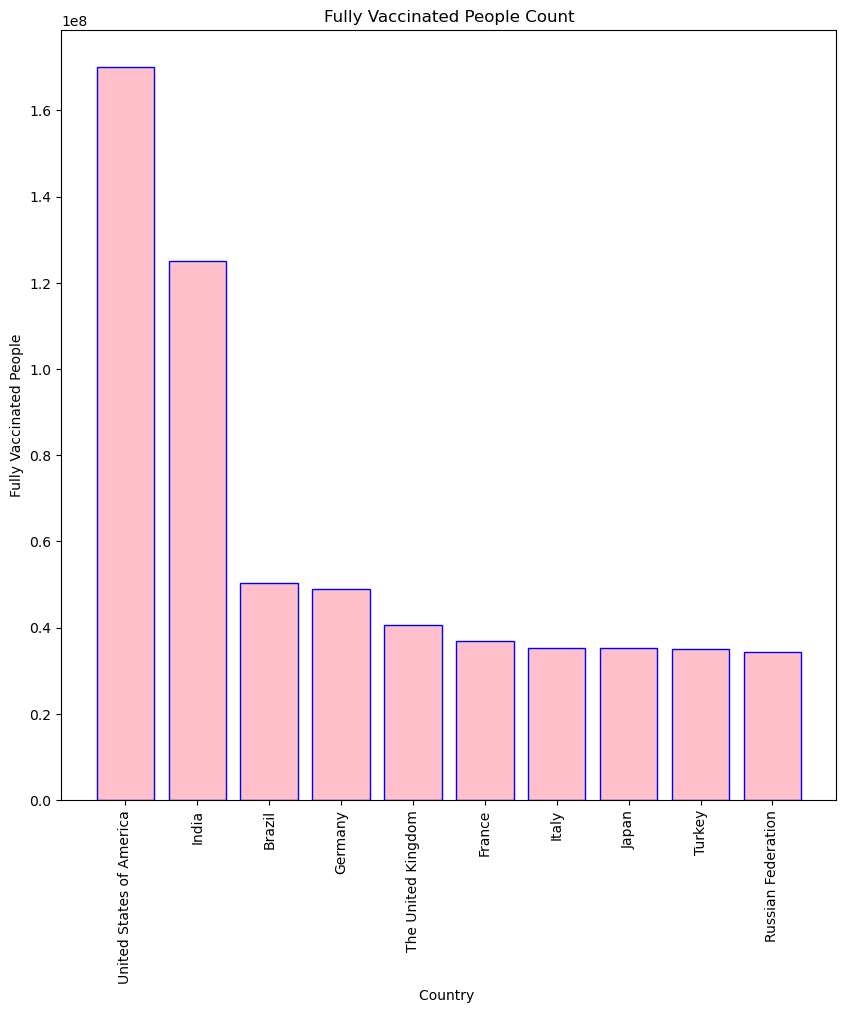

In [44]:
from matplotlib import pyplot as plt  
plt.figure(figsize = (10,10))
plt.bar(aa["COUNTRY"],aa["PERSONS_FULLY_VACCINATED"],color='Pink',edgecolor='b') 
plt.title('Fully Vaccinated People Count')  
plt.xlabel('Country ')  
plt.ylabel('Fully Vaccinated People') 
plt.xticks(rotation = 90)
plt.show()  